# 데이터 분석 및 전처리

- 데이터 연관성 분석
- 데이터 전처리

In [1]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 데이터 경로
PATH = 'open/external_open/'

In [3]:
AllCountry = pd.read_csv(PATH + 'countrywide_accident.csv')
Daegu = pd.read_csv('open/train.csv')
result_set = pd.read_csv('open/test.csv')

## 데이터 인코딩
- 한글로 되어 있는 데이터를 정수로 인코딩

In [4]:
test_col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형']

In [5]:
train_set = Daegu[[*test_col, 'ECLO']]

In [6]:
train_set

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,화요일,맑음,단일로 - 기타,건조,차대사람,5
1,화요일,흐림,단일로 - 기타,건조,차대사람,3
2,화요일,맑음,단일로 - 기타,건조,차대사람,3
3,화요일,맑음,단일로 - 기타,건조,차대차,5
4,화요일,맑음,단일로 - 기타,건조,차대차,3
...,...,...,...,...,...,...
39604,금요일,맑음,교차로 - 교차로안,건조,차대차,3
39605,금요일,맑음,단일로 - 기타,건조,차대차,3
39606,금요일,맑음,교차로 - 교차로안,건조,차대차,10
39607,금요일,맑음,기타 - 기타,건조,차대차,3


In [7]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
weathers = ['맑음', '흐림', '비', '눈', '안개', '기타']
road_types = sorted(list(set(train_set['도로형태'])))
road_conditions = sorted(list(set(train_set['노면상태'])))
accident_types = sorted(list(set(train_set['사고유형'])))

In [8]:
# 요일 인코딩
for encode_num, day in enumerate(days):
    train_set['요일'][train_set['요일']==day] = encode_num
    result_set['요일'][result_set['요일']==day] = encode_num

<ipython-input-8-7504a67c779e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['요일'][train_set['요일']==day] = encode_num
<ipython-input-8-7504a67c779e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['요일'][train_set['요일']==day] = encode_num
<ipython-input-8-7504a67c779e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['요일'][train_set['요일']==day] = encode_num
<ipython-input-8-7504a67c779e>:3: SettingWithC

In [9]:
# 날씨 인코딩
for encode_num, weather in enumerate(weathers):
    train_set['기상상태'][train_set['기상상태']==weather] = encode_num
    result_set['기상상태'][result_set['기상상태']==weather] = encode_num

<ipython-input-9-da3afd86ed20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['기상상태'][train_set['기상상태']==weather] = encode_num
<ipython-input-9-da3afd86ed20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['기상상태'][train_set['기상상태']==weather] = encode_num
<ipython-input-9-da3afd86ed20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['기상상태'][train_set['기상상태']==weather] = encode_num
<ipython-input-9-da3af

In [10]:
# 도로형태 인코딩
for encode_num, road_type in enumerate(road_types):
    train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
    result_set['도로형태'][result_set['도로형태']==road_type] = encode_num

<ipython-input-10-c0a58b28d26f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
<ipython-input-10-c0a58b28d26f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
<ipython-input-10-c0a58b28d26f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['도로형태'][train_set['도로형태']==road_type] = encode_num
<ipython-inpu

In [11]:
# 노면상태 인코딩
for encode_num, road_condition in enumerate(road_conditions):
    train_set['노면상태'][train_set['노면상태']==road_condition] = encode_num
    result_set['노면상태'][result_set['노면상태']==road_condition] = encode_num

<ipython-input-11-8b214a0444a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['노면상태'][train_set['노면상태']==road_condition] = encode_num
<ipython-input-11-8b214a0444a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['노면상태'][train_set['노면상태']==road_condition] = encode_num
<ipython-input-11-8b214a0444a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['노면상태'][train_set['노면상태']==road_condition] = encode_nu

In [12]:
train_set

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,1,0,6,0,차대사람,5
1,1,1,6,0,차대사람,3
2,1,0,6,0,차대사람,3
3,1,0,6,0,차대차,5
4,1,0,6,0,차대차,3
...,...,...,...,...,...,...
39604,4,0,1,0,차대차,3
39605,4,0,6,0,차대차,3
39606,4,0,1,0,차대차,10
39607,4,0,3,0,차대차,3


In [13]:
# 사고유형 인코딩
for encode_num, accident_type in enumerate(accident_types):
    train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num
    result_set['사고유형'][result_set['사고유형']==accident_type] = encode_num

<ipython-input-13-a7d64a56dc24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num
<ipython-input-13-a7d64a56dc24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num
<ipython-input-13-a7d64a56dc24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['사고유형'][train_set['사고유형']==accident_type] = encode_num


In [14]:
for col in train_set.columns:
    train_set[col] = train_set[col].astype(int)
    if col != 'ECLO':
        result_set[col] = result_set[col].astype(int)

<ipython-input-14-8620877e727e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[col] = train_set[col].astype(int)
<ipython-input-14-8620877e727e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[col] = train_set[col].astype(int)
<ipython-input-14-8620877e727e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [15]:
train_set.to_csv('train_set.csv', index=False)
result_set.to_csv('test_set.csv', index=False)

## 데이터 분석
- 히트맵

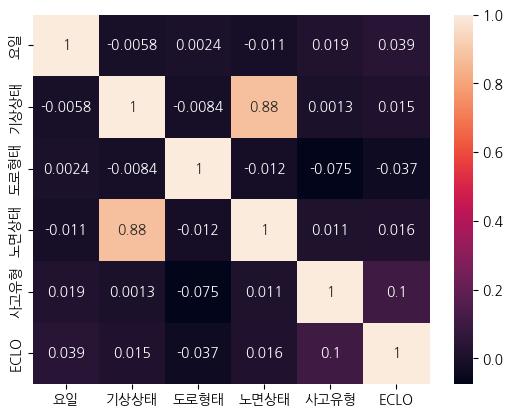

In [16]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(train_set.corr(), annot=True)
plt.show()

In [17]:
train_set.describe()

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,2.852584,0.159534,3.599333,0.316393,0.852508,4.726704
std,1.933949,0.546488,2.627824,1.076443,0.419263,3.207206
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000
50%,3.000000,0.000000,6.000000,0.000000,1.000000,3.000000
75%,4.000000,0.000000,6.000000,0.000000,1.000000,6.000000
max,6.000000,5.000000,10.000000,5.000000,2.000000,74.000000


In [32]:
graph_counter = Counter(train_set['ECLO'])
graph_y = [graph_counter[i] for i in sorted(graph_counter.keys())]

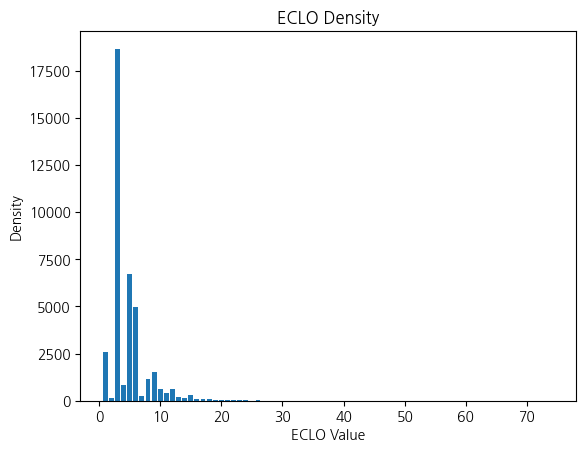

In [38]:
plt.bar(sorted(list(Counter(train_set['ECLO']).keys())), graph_y)
plt.xlabel('ECLO Value')
plt.ylabel('Density')
plt.title('ECLO Density')
plt.show()